In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 8  #Número de lados del poliedro
listVect = []
alpha = 2*np.pi/N
for i in range(N):
    listVect.append([np.sin(i*alpha),-np.cos(i*alpha)])
V = np.array(listVect)

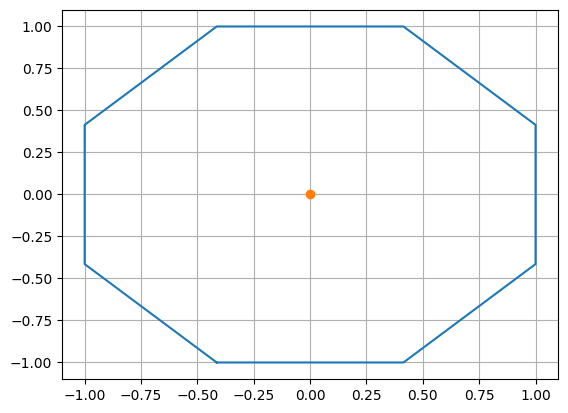

In [3]:
vecLong = np.linspace(-1,1,100)     #Vector para determinar la longitud de los lados
pP = []             
for lado in range(N):               #Crear las coordenadas del polinomio            
    for dx in vecLong:
        pP.append( [ V[lado,0] + np.tan(alpha/2)* np.cos(alpha*lado)*dx   ,  V[lado,1] + np.tan(alpha/2)* np.sin(alpha*lado)*dx ] )
pP = np.array(pP)

plt.plot(pP[:,0],pP[:,1])
plt.plot(0,0,'o')
plt.grid()
plt.show()



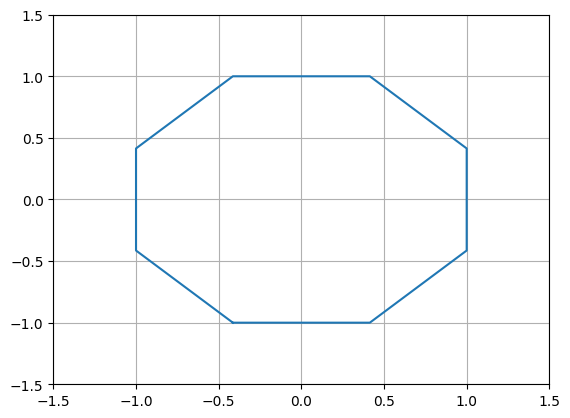

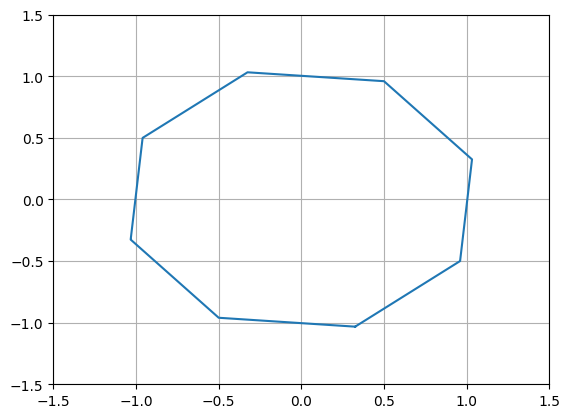

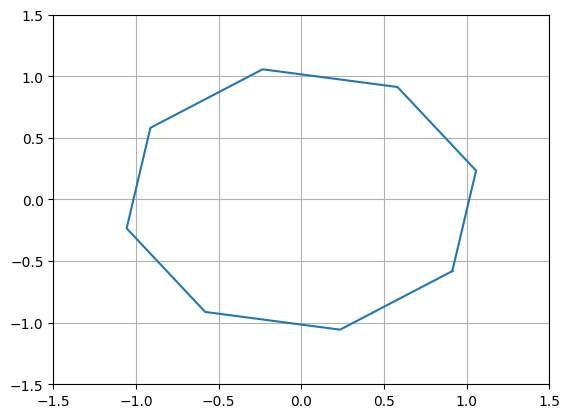

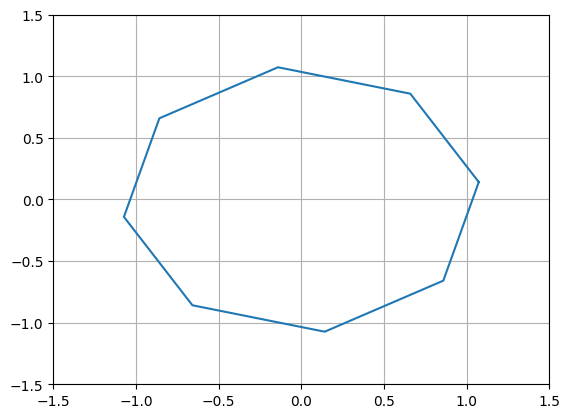

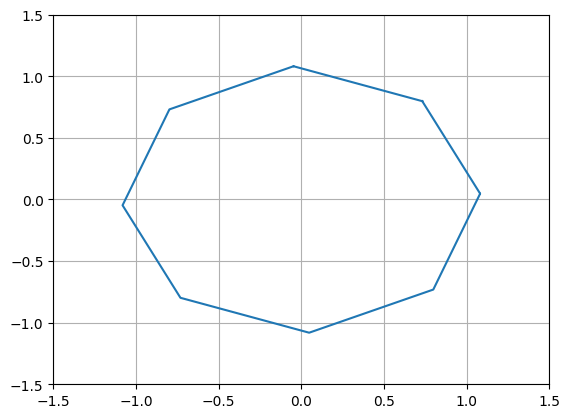

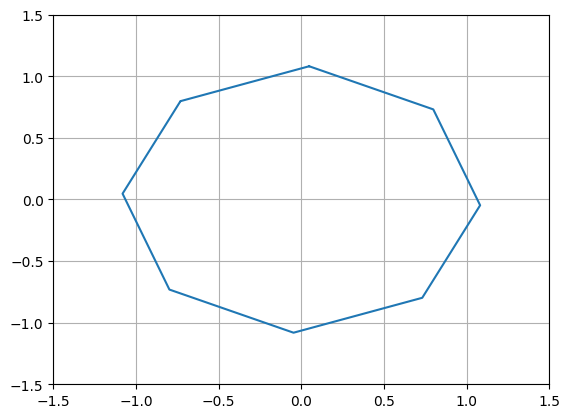

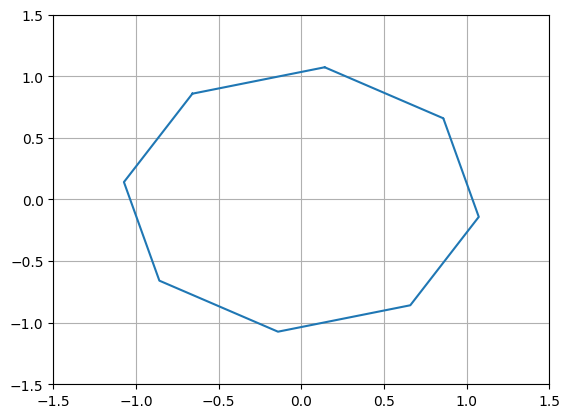

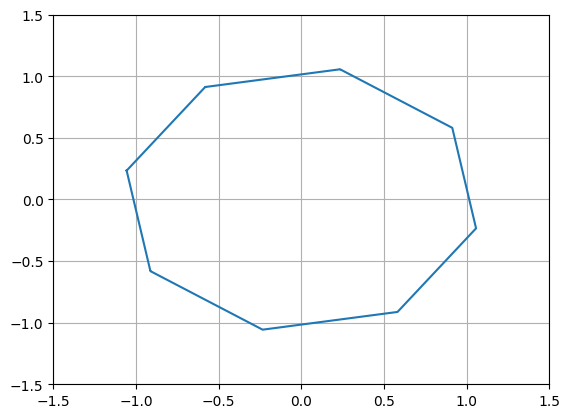

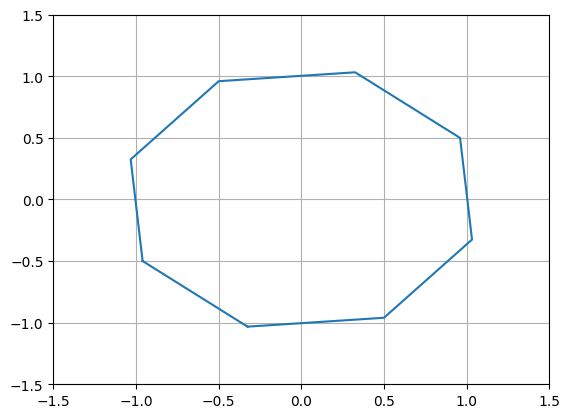

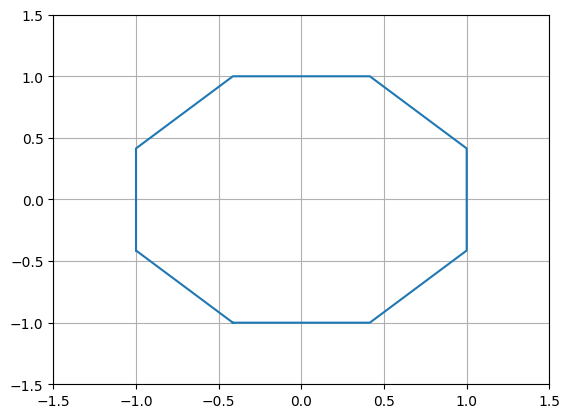

<Figure size 640x480 with 0 Axes>

In [ ]:
rot = np.linspace(0,2*np.pi,10) 

plt.ion()
for rotation in rot:
    l = 1.5
    tP = []
    for x,y in pP:
        tP.append( [ np.cos(rotation)*x - np.sin(rotation)*y  , np.sin(rotation)*x + np.cos(rotation)*y ] )
    tP = np.array(tP)
    plt.plot(tP[:,0],tP[:,1])
    plt.xlim(-l,l)
    plt.ylim(-l,l)
    plt.grid()
    plt.draw()
    plt.pause(0.001)
    plt.clf()

In [ ]:
def distance(x1,y1,x2,y2):
    return np.sqrt( (x1-x2)**2 + (y1-y2)**2 )

def dotProduct(X1,X2):
    return X1[0]*X2[0] + X1[1]*X2[1]

def angB2V(X1,X2):
    cosAlpha = dotProduct(X1,X2)/(distance(X1[0],X1[1],0,0) * distance(X2[0],X2[1],0,0))
    alpha = np.arccos(cosAlpha)
    return alpha

print(180/np.pi * angB2V([np.sqrt(2),np.sqrt(2)],[0,1]))
    

45.0


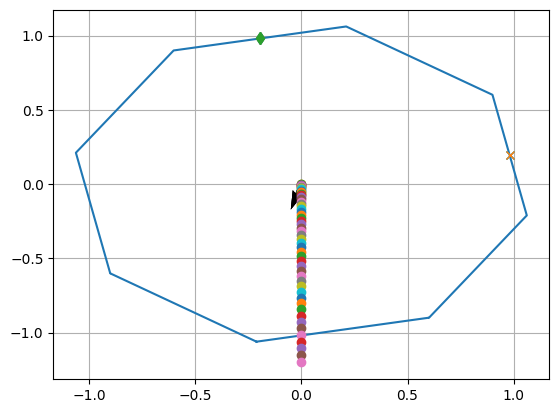

In [ ]:
xb,yb,vxb,vyb  = 0,0,0,0 #Parámetros Físicos
g = -9.81
X = np.array([xb,yb])
V = np.array([vxb,vyb])
dt = 0.01
plt.figure()
plt.plot(tP[:,0],tP[:,1])
for i in range(50):
    plt.plot(xb,yb,'o')
    for Vx,Vy in listVect:
        if distance(xb,yb,Vx,Vy) <= np.tan(alpha/2):
            for i in range(len(tP)):
                if distance(xb,yb,tP[i,0],tP[i,1])<=0.015:
                    #print(f'Los puntos donde se realizó la colisión fue: {tP[i,0],tP[i,1]}') 
                    gradLinear = np.arctan((tP[i,1]-tP[i+1,1])/(tP[i,0]-tP[i+1,0]))                    
                    #print(f'El gradiente-tangente de la linea de colisión es: {gradLinear}')
                    plt.plot(np.cos(gradLinear), np.sin(gradLinear),'x' )
                    plt.plot(-np.sin(gradLinear), np.cos(gradLinear),'d' )
                    v = np.sqrt(vxb**2 + vyb**2)
                    angAux = angB2V([vxb,vyb] , [-np.sin(gradLinear), np.cos(gradLinear)])
                    vxbAux,vybAux = v*np.sin(2*angAux),-v*np.cos(2*angAux)
                    plt.quiver(0,0,vxbAux,vybAux)
    vxb += 0 
    vyb += g*dt
    xb += vxb*dt
    yb += vyb*dt 
plt.grid()
plt.show() 